<a href="https://colab.research.google.com/github/Mirsha-RG/machine-learning-python-template/blob/main/Regresion_salud_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [57]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv'

In [58]:
df = pd.read_csv(url)

In [59]:
#df.dtypes
#df.describe()
#df.isnull().sum()
df.isnull().any().any()



np.False_

In [60]:
def columnas_con_tipo_incorrecto(df, tipos_esperados=['float64', 'object', 'int64']):
    columnas_erroneas = []

    for col in df.columns:
        if df[col].dtype.name not in tipos_esperados:
            columnas_erroneas.append(col)


    return columnas_erroneas

columnas_malas = columnas_con_tipo_incorrecto(df)

if columnas_malas:
    print("Estas columnas tienen tipos distintos a float u object:")
    print(columnas_malas)
else:
    print("Todas las columnas tienen tipo float, int u object.")

columnas_con_tipo_incorrecto(df)

Todas las columnas tienen tipo float, int u object.


[]

In [61]:
#df.dtypes.value_counts()
#df_info = df.dtypes.reset_index()
#df_info.columns = ['columna', 'tipo']
#print(df_info.to_string(index=False))


In [62]:
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


Descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

In [63]:
df_info = df.dtypes.reset_index()
print(df_info.to_string(index=False))

                                                                        index       0
                                                                         fips   int64
                                                                      TOT_POP   int64
                                                                          0-9   int64
                                                       0-9 y/o % of total pop float64
                                                                       19-Oct   int64
                                                     10-19 y/o % of total pop float64
                                                                        20-29   int64
                                                     20-29 y/o % of total pop float64
                                                                        30-39   int64
                                                     30-39 y/o % of total pop float64
                                                      

In [64]:
X = df[["Less than a high school diploma 2014-18",
        "High school diploma only 2014-18",
        "Some college or associate's degree 2014-18",
        "Bachelor's degree or higher 2014-18"]]
y = df[["Heart disease_prevalence"]]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=0.1, max_iter=300)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Modelo Ridge corregido
ridge_model = Ridge(alpha=0.1, max_iter=300)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluar R²
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'R² Lasso: {r2_lasso:.4f}')
print(f'R² Ridge: {r2_ridge:.4f}')

R² Lasso: 0.1541
R² Ridge: 0.1541


#Betas

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Lasso

In [67]:

y = y.to_numpy() if not isinstance(y, np.ndarray) else y
X = X.to_numpy() if not isinstance(X, np.ndarray) else X


X_design = np.column_stack((np.ones(X.shape[0]), X))

def betas(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

beta_hat = betas(X_design, y)
print(" beta calculados")
print(beta_hat)

 beta calculados
[[ 8.83941450e+00]
 [ 2.82952611e-05]
 [ 2.90168383e-08]
 [-1.47760936e-05]
 [-8.06237654e-06]]


#Regresion Lineal

In [68]:
modelo = smf.ols(formula= 'y ~ X', data=df).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     142.4
Date:                Fri, 18 Jul 2025   Prob (F-statistic):          5.15e-112
Time:                        00:48:05   Log-Likelihood:                -5965.4
No. Observations:                3140   AIC:                         1.194e+04
Df Residuals:                    3135   BIC:                         1.197e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8394      0.032    273.212      0.0

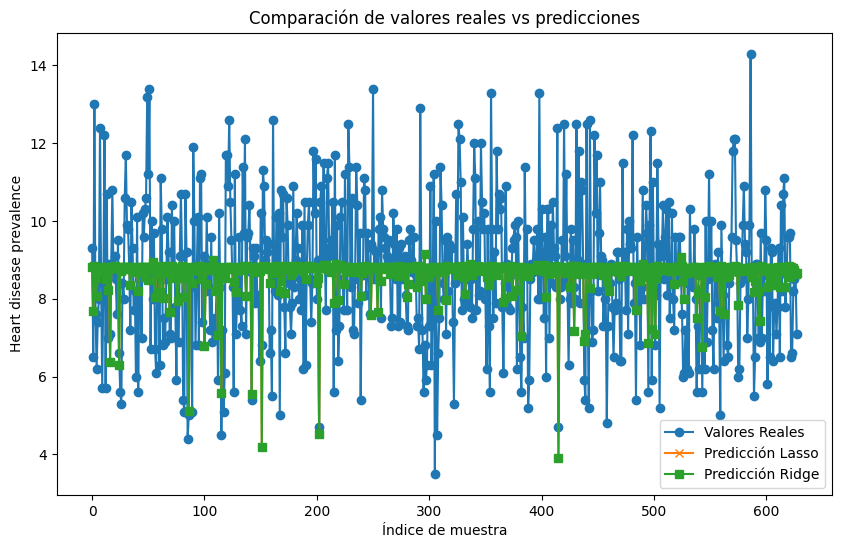

In [72]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Valores Reales', marker='o')
plt.plot(y_pred_lasso, label='Predicción Lasso', marker='x')
plt.plot(y_pred_ridge, label='Predicción Ridge', marker='s')
plt.xlabel('Índice de muestra')
plt.ylabel('Heart disease prevalence')
plt.title('Comparación de valores reales vs predicciones')
plt.legend()





#Conslusion

El objetivo de este análisis era evaluar la relación entre el nivel educativo y la prevalencia de enfermedades cardíacas, bajo la hipótesis de que niveles educativos más altos podrían estar asociados con ocupaciones intelectualmente más demandantes y, por tanto, con mayores niveles de estrés que contribuyeran al desarrollo de afecciones cardíacas a largo plazo.

Sin embargo, los resultados de la regresión sugieren lo contrario: a medida que aumenta el nivel educativo, disminuye el riesgo de padecimientos cardíacos. Esto podría explicarse por diversos factores asociados al nivel educativo, como un mayor acceso a información sobre salud, mejores condiciones laborales, o estilos de vida más saludables.
